In [1]:
import sys
import numpy as np
from cgp.cgp import CgpConfig, Individual
from cgp.utils import plot_graph, plot_cartesian
from IPython.display import SVG, HTML
from IPython.display import Image as Img
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from PIL import Image
import io

In [2]:
def conv(input):
    pass

def conv_3x3(input):
    pass

def conv_7x7(input):
    pass

def depth_conv(input):
    pass

def max_pooling(input):
    pass

def sum(a, b):
    pass

def concat(input):
    pass

6


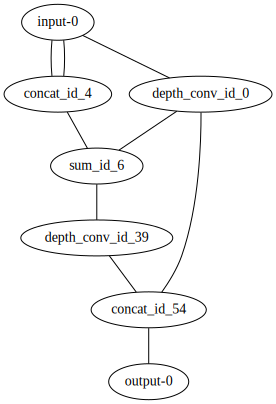

In [4]:
functions = [conv, conv_3x3, conv_7x7, depth_conv, sum, concat, max_pooling]
inputs = [1, 1, 1, 1, 2, 2, 1]
cfg = CgpConfig(5, 20, 10, functions, inputs)
cfg.num_input = 1
cfg.num_output = 1
indivdual = Individual(cfg)

print(len(np.where(indivdual.active == True)[0]))
graph = plot_graph(indivdual)
SVG(graph.create(prog='dot', format='svg'))

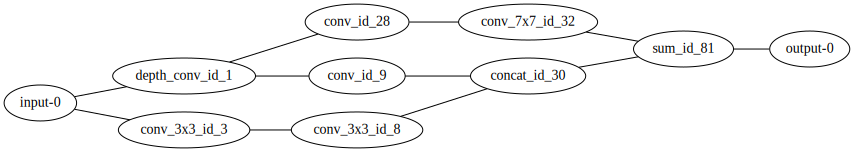

In [39]:
graph = plot_graph(indivdual, rankdir='LR')
SVG(graph.create(prog='dot', format='svg'))

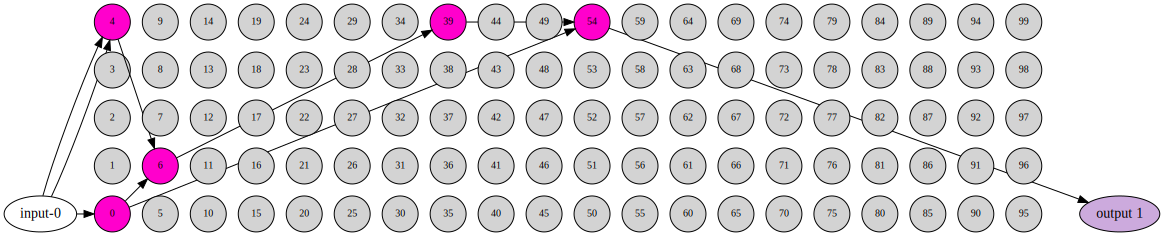

In [7]:
grid = plot_cartesian(indivdual)
SVG(grid.create(prog='neato', format='svg'))

In [46]:
class SubplotAnimation(animation.TimedAnimation):
    def __init__(self):
        graph = plot_graph(indivdual, rankdir='TB')
        grid = plot_cartesian(indivdual)
        graph.set('dpi', 300)
        grid.set('dpi', 300)
        
        self.mut_cnt = 0
        fig = plt.figure(figsize=(18,15))
        plt.subplot(2,1,1)
        self.title = plt.suptitle("root")
        plt.axis('off')
        img_graph = graph.create(prog='dot', format='png')
        self.im_graph = plt.imshow(Image.open(io.BytesIO(img_graph)), animated=True)

        plt.subplot(2,1,2)
        plt.axis('off')
        img_grid = grid.create(prog='neato', format='png')
        self.im_grid = plt.imshow(Image.open(io.BytesIO(img_grid)), animated=True)        
        animation.TimedAnimation.__init__(self, fig, interval=2000, blit=True)
    
    def new_frame_seq(self):
        return range(10)

    def _draw_frame(self, framedata):
        self.mut_cnt += 1
        indivdual.mutate()
        graph = plot_graph(indivdual, rankdir='TB')
        grid = plot_cartesian(indivdual)
        img_graph = graph.create(prog='dot', format='png')
        img_grid = grid.create(prog='neato', format='png')
        self.title.text = "mutation %d" % mut_cnt
        self.im_graph.set_data(Image.open(io.BytesIO(img_graph)))
        self.im_grid.set_data(Image.open(io.BytesIO(img_grid)))
        self._drawn_artists = [self.im_graph, self.im_grid, self.title]
        

#anim = animation.FuncAnimation(fig, updatefig, init_func=init_func, frames=20, interval=1500, blit=False)
#write = animation.FFMpegWriter(fps=0.5, bitrate=1000, extra_args=['-vcodec', 'libx264'])
#anim.save('anim.mp4', writer=write, dpi=150)
anim = SubplotAnimation()
anim.save('anim.gif', dpi=72, writer='imagemagick')
plt.close()

[]('anim.gif')

<img src="anim.gif?as">